In [2]:
import datetime as dt
import numpy as np
import pickle
import gdal

import datetime as dt

from plot_kafka_retrieval_utils import extract_pixel, plot_pixel_tseries

import matplotlib.pylab as plt
%matplotlib inline

In [3]:
def get_pixel(filepath, year, x, y, params = None):
    """
    Get retrieved parameters and uncertainties for a single pixel
    This will open the data from a pickle file if it exists, otherwise
    it calls extract_pixel, which will get the data and also store a pickle file
    for next time.
    """
    file = filepath+"/pixel_{}_{}.pkl".format(x,y)
    print(file)
    try:
        data, uncs, dates = pickle.load(open(file, 'rb'))
    except FileNotFoundError:
        data, uncs, dates = extract_pixel(filepath, year, x,y, params=params, outfile=file)
    return data, uncs, dates

## Plot a single parameter and uncertainty

saving output to /home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_Q0-05/pixel_210_460.pkl
dict_keys(['n', 'cab', 'car', 'cbrown', 'cw', 'cm', 'lai', 'ala', 'bsoil', 'psoil'])


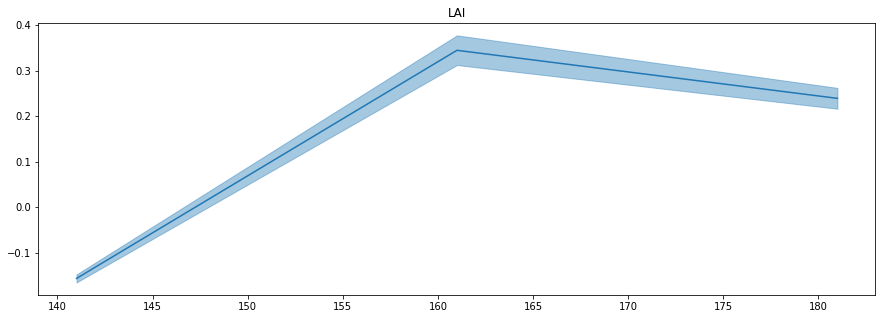

In [17]:
#filepath = "/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop"
filepath = "/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop"
#filepath ="/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_NoProp/"
#filepath = "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_unc10_NoProp/"
filepath = "/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_unc10_noprop"

filepath = "/home/npounder/output/planet/kafkaout_planet_0-025_1pd"
filepath = "/home/npounder/output/planet/kafkaout_planet_noprop_1pd"
filepath = "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_newmask_NoProp"
filepath = "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_newmask_0-05"

#filepath = "/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_Q0-05"
filepath = "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_Q0-05"


parameter_list = ['n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'lai', 'ala', 'bsoil', 'psoil']
x = 210; y= 460
#x=575; y = 575
param = "lai"
fig, ax = plt.subplots(1,1, figsize=(15,5))
#data, uncs, dates = get_pixel(filepath, 2017,x,y, params = parameter_list)

file = filepath+"/pixel_{}_{}.pkl".format(x,y)
data, uncs, dates = extract_pixel(filepath, 2017, x,y, params=parameter_list, outfile=file)

print(data.keys())
plot_pixel_tseries(ax, data[param], uncs[param], dates, parameter = param,
                   marker = '-', convertLAI = True)



In [4]:

def plot_pixel_tseries_s2(ax, data, unc, dates, parameter ="lai",
                       marker = '-', convertLAI = False, error="shading"):
    labels = {"lai":"Transformed LAI", 
              'n':"n",
              'cab':"cab",
              'car':"car", 
              'cbrown':"cbrown",
              'cw':"cw",
              'cm':"cm",
              'ala':"ala", 
              'bsoil':'bsoil',
              'psoil':"psoil"}
    try:
        l_unc = data-unc
    except ValueError:
        l_unc = data
    try:
        u_unc = data+unc
    except ValueError:
        u_unc = data
    if convertLAI is True:
        data = -2*np.log(data)
        l_unc = -2.*np.log(l_unc)
        u_unc = -2.*np.log(u_unc)
        l_unc[np.isnan(l_unc)] = 10
        labels["lai"] = "LAI"
    maskprior = np.where(abs(data-4.0)>0.0000001)
    if error == "bar":
        uncs = np.array([l_unc[maskprior], u_unc[maskprior]])
        p = ax.errorbar(np.array(np.array(dates)[maskprior]), np.array(data)[maskprior], 
                        yerr=uncs, linestyle='None',
                        marker=marker, label=labels[parameter])
    else:
        p = ax.plot(np.array(np.array(dates)[maskprior]), np.array(data)[maskprior],
                    marker=marker, linestyle='None', label=labels[parameter])
    if error=="shading":
        color = (p[0].get_color())
        ax.fill_between(np.array(dates), l_unc, u_unc,
                        color=color, alpha=0.4)
        
    ax.set_title(labels[parameter])
    return ax


In [22]:
def plot_all_params(axs, params, filepaths, year, x, y, legend = None, error="shading"):
    """loop through different retrieval direcories and plot all parameters"""
    for ax, param in zip(axs, params):
        title = "{}".format(param)
        if param == "LAI":
            param = "lai"
            convertLAI = True
        else:
            convertLAI = False
        for f in filepaths:
            data, uncs, dates = get_pixel(f, year, x,y)#
            #print (param)
            #print (data.keys)
            #print (data[param])
            plot_pixel_tseries_s2(ax, data[param], uncs[param], dates, parameter = param,
                               marker='o', convertLAI=convertLAI, error=error)
        #ax.set_title(title)
        if legend !=None:
            ax.legend(legend)
    return axs

In [23]:
# These [parameters may be used for any narrowband SAIL retrieval]
#params=["LAI","TeLAI", "w_nir", "x_nir", "a_nir",
#        "w_vis", "x_vis", "a_vis"]
params = ['LAI', 'lai', 'n', 'cab', 'car', 'cbrown', 'cw', 'cm',
                  'ala', 'bsoil', 'psoil']

## California

/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop/pixel_210_460.pkl
/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_NoProp//pixel_210_460.pkl
/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_Q0-05/pixel_210_460.pkl


/home/npounder/anaconda2/envs/py36_gp_emulator/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


Text(0.5,1,'LAI retrieved from planetlabs')

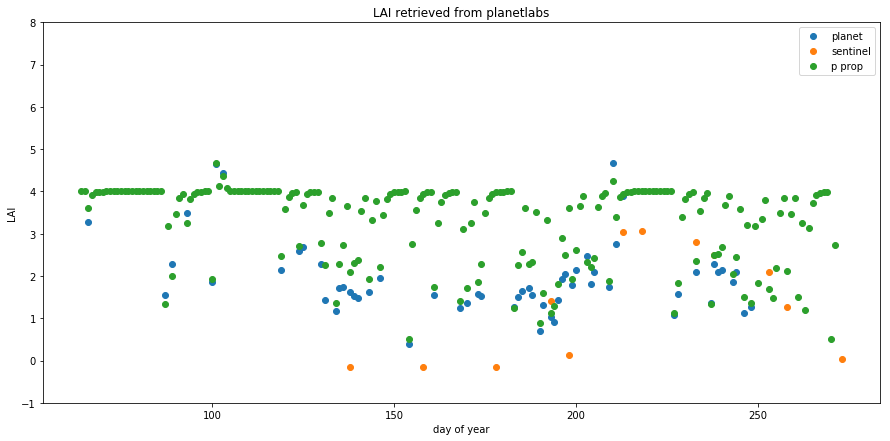

In [26]:
params = ['LAI']
filepaths = ["/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop",
             "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_NoProp/",
             "/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_Q0-05"#,
             #"/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_Q0-05"
            ]
legend = ("planet", "sentinel", "p prop", "s prop")
#filepaths = ["/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_unc10_noprop",
#             "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_unc10_NoProp/"
#             ]
#filepaths = ["/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_Q0-05",
#             "

x = 210; y= 460

#filepaths = [#"/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_newmask_0-05",
#            #"/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_newmask_NoProp",
#             "/home/npounder/output/planet/kafkaout_planet_0-025_1pd",
#             "/home/npounder/output/planet/kafkaout_planet_noprop_1pd"]
#x=575; y = 575
    
#legend = ("planet, propagated", "planet, not propagated")
fig, axs = plt.subplots(1,1, figsize=(15,7))
#axs = axs.flatten()
plot_all_params([axs], params, filepaths, 2017, x, y, legend = legend, error=None)
axs.set_ylim([-1,8])
axs.set_xlabel("day of year")
axs.set_ylabel("LAI")
axs.set_title("Retrieved LAI with observation uncertainty 5% for S2 and 20% planet labs")
#axs.set_title("Retrieved LAI with 10% observation uncertainty")
axs.set_title("LAI retrieved from planetlabs")

/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop/pixel_210_460.pkl
(array([  3,  24,  26,  30,  37,  38,  40,  56,  61,  62,  67,  68,  71,
        72,  73,  75,  76,  77,  80,  83,  91,  98, 105, 107, 110, 111,
       120, 121, 122, 124, 125, 127, 128, 130, 131, 132, 133, 134, 136,
       137, 140, 141, 142, 146, 147, 148, 150, 164, 165, 170, 174, 175,
       176, 177, 180, 181, 183, 185]),)
/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_NoProp//pixel_210_460.pkl
(array([ 16,  36,  56,  71,  76,  91,  96, 111, 116, 131, 136, 151]),)
/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop/pixel_210_460.pkl
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  

/home/npounder/anaconda2/envs/py36_gp_emulator/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8287b34828>,
      dtype=object)

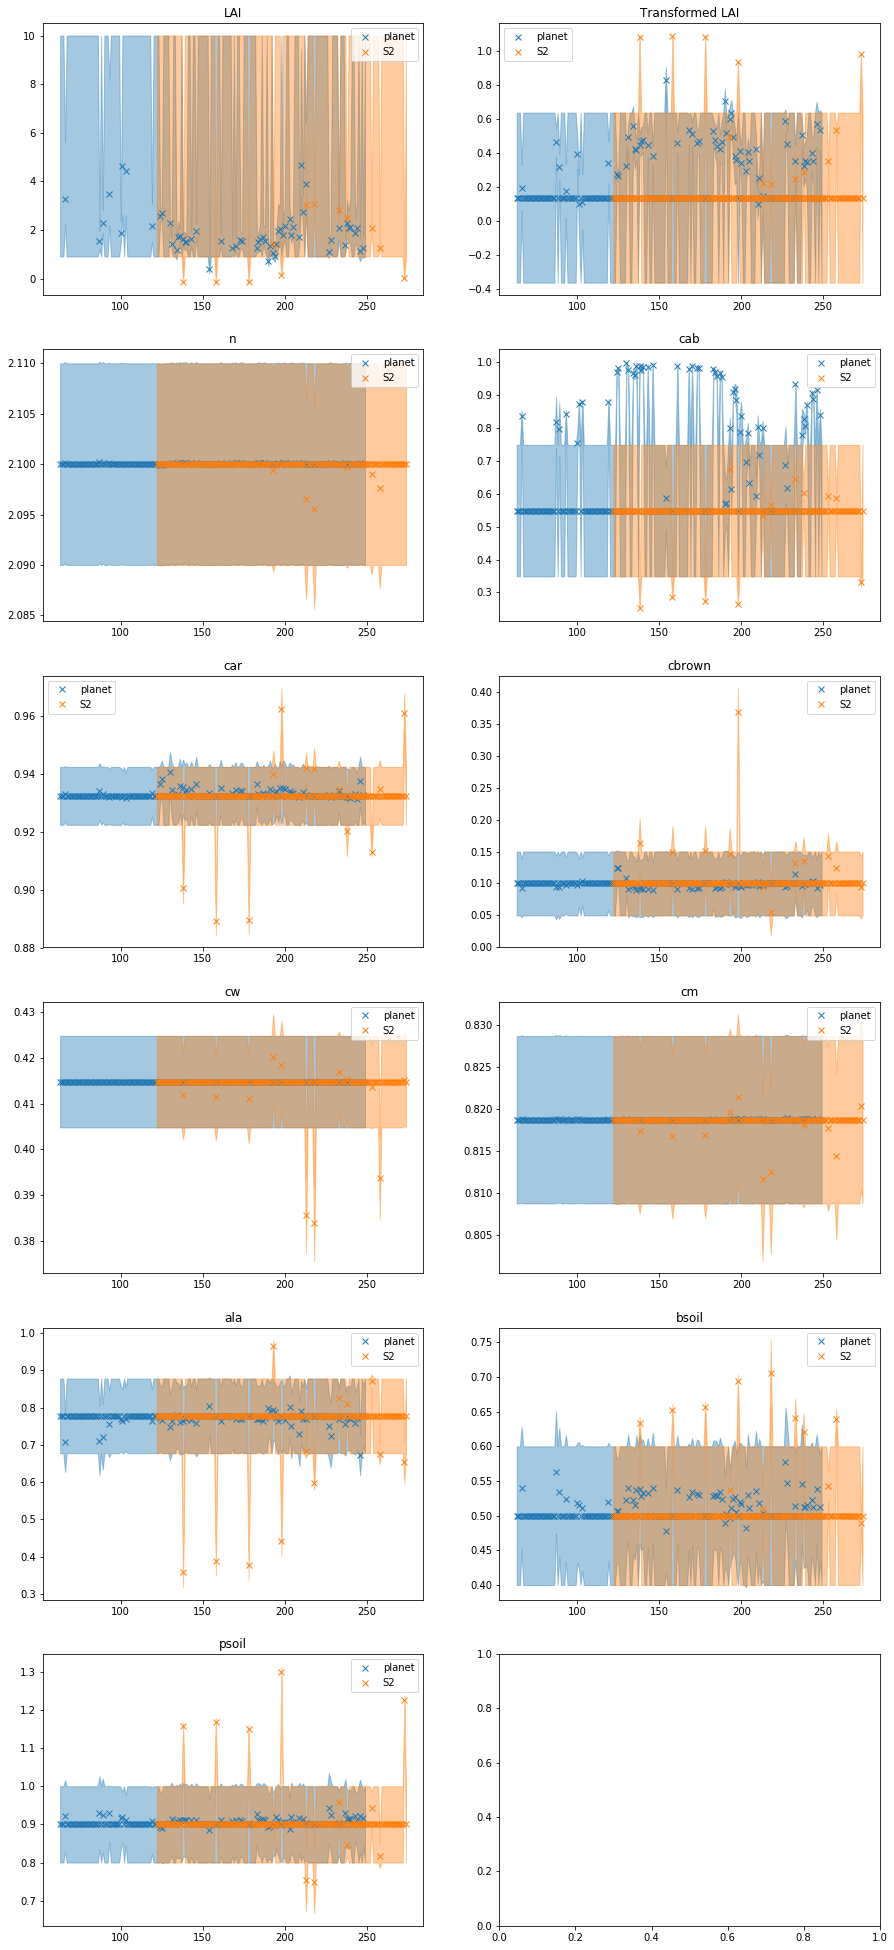

In [43]:
filepaths = ["/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_noprop",
             "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_NoProp/"]
#filepaths = ["/home/npounder/output/planet/kafkaout_planet_goodmask_subset2_unc10_noprop",
#             "/home/npounder/output/kafka/validation/S2/kafkaout_S2_Cali_2017_goodmask_unc10_NoProp/"
#             ]
legend = ("planet", "S2")
x = 210; y= 460
fig, axs = plt.subplots(6,2, figsize=(15,35))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2017, x, y, legend = legend)

In [11]:
%debug


> /home/npounder/anaconda2/envs/py36_gp_emulator/lib/python3.6/site-packages/matplotlib/axes/_base.py(243)_xy_from_xy()
    241         if x.shape[0] != y.shape[0]:
    242             raise ValueError("x and y must have same first dimension, but "
--> 243                              "have shapes {} and {}".format(x.shape, y.shape))
    244         if x.ndim > 2 or y.ndim > 2:
    245             raise ValueError("x and y can be no greater than 2-D, but have "

ipdb> who
*** NameError: name 'who' is not defined
ipdb> print(x)
[ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 

In [35]:
for key in data.keys():
    print(key, data[key].shape)
    print(key, uncs[key].shape)
print(len(dates))


n (174,)
n (174,)
cab (174,)
cab (174,)
car (174,)
car (174,)
cbrown (174,)
cbrown (174,)
cw (174,)
cw (174,)
cm (174,)
cm (174,)
lai (174,)
lai (174,)
ala (174,)
ala (174,)
bsoil (174,)
bsoil (174,)
psoil (174,)
psoil (174,)
174


In [ ]:
## Alcornocales, Forest

In [ ]:
filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_no_prop_HessCorr/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-01/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-05/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-075/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-1/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Arros_0-25/"]
legend = ("none","0.01", "0.05", "0.075", "0.1", "0.25")
x = 698; y= 1230

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2017, x, y, legend = legend)

## Bondville, wheat

In [ ]:

filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-05/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-1/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-25/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_0-5/"]
modisname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'


legend = ("none", "0.05", "0.1", "0.25", "0.5")
line = 2298; row = 569

fig, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()
plot_all_params(axs, params, filepaths, 2006, line, row, legend)

#Add MODIS LAI
vrt_d = gdal.Open(modisname)
mcd15 = vrt_d.ReadAsArray(row, line, 1, 1 )*0.1
axs[0].plot(np.arange(9,366,8), mcd15[:-1,0,0], 'k+')
legend = ("none", "0.05", "0.1", "0.25", "0.5", 'MODIS LAI')
axs[0].legend(legend)
axs[0].set_ylim([-0.1, 10.0])

axs[1].plot(np.arange(9,366,8), np.exp(-2*mcd15[:-1,0,0]), 'k+')
legend = ("none", "0.05", "0.1", "0.25", "0.5", 'MODIS LAI')
axs[1].legend(legend)



## Bondville with prior LAI
For AR meeting

In [ ]:
filepaths = ["/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-25/",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_DblPrior_0-25",
             "/home/npounder/output/kafka/28Mar/kafkaout_Bondville_DblPrior_take2_0-25/"]#,
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-5/",
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-75/"]
modisname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'

params = ["LAI"]
legend = ("no propagation", "Propagation","doubleprior","doubleprior2")
line = 2298; row = 569

#fig, axs = plt.subplots(4,2, figsize=(15,15))
#axs = axs.flatten()
fig, axs = plt.subplots(1,1, figsize=(15,7))
axs = [axs]
plot_all_params(axs, params, filepaths, 2006, line, row, legend)

#Add MODIS LAI
vrt_d = gdal.Open(modisname)
mcd15 = vrt_d.ReadAsArray(row, line, 1, 1 )*0.1
axs[0].plot(np.arange(9,366,8), mcd15[:-1,0,0], 'k+')
legend = legend + ("MODIS LAI product",)
axs[0].legend(legend)
axs[0].set_ylim([-0.1, 10.0])
axs[0].set_xlabel("Day of year")
axs[0].set_ylabel("LAI")
axs[0].set_title("Bondville, wheat")
#axs[1].plot(np.arange(9,366,8), np.exp(-2*mcd15[:-1,0,0]), 'k+')
#legend = ("none", "0.25", "0.5", "0.75", 'MODIS LAI')
#axs[1].legend(legend)


In [ ]:
filepaths = [#"/home/npounder/output/kafka/28Mar/kafkaout_Bondville_noprop/",
             "/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-25/"]#,
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-5/",
             #"/home/npounder/output/kafka/28Mar/deprecated/kafkaout_bondville_b_0-75/"]
modisname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'

params=["w_nir", "x_nir", "a_nir",
        "w_vis", "x_vis", "a_vis"]
#legend = ("no propagation", "Propagation",)
line = 2298; row = 569

fig, axs = plt.subplots(3,2, figsize=(15,9))
axs = axs.flatten()
#fig, axs = plt.subplots(1,1, figsize=(15,7))
#axs = [axs]
plot_all_params(axs, params, filepaths, 2006, line, row, None)


fig.tight_layout()

In [ ]:
import gdal

line = 2298; row = 569
fname = '/data/MODIS/h11v04/MOD15A2H/MOD15A2H.A2006.h11v04.006.Lai_500m.vrt'
vrt_d = gdal.Open( fname )
mcd15 = vrt_d.ReadAsArray( row, line, 1, 1 )


In [ ]:
mcd15[:,0,0]
